<a href="https://colab.research.google.com/github/FifinNov/Skin-Classification/blob/main/Skin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt"
names = ['Blue','Green','Red','Class']
dataset = pd.read_csv(url, sep='\t', names=names)

In [ ]:
print(dataset.shape)

(245057, 4)


In [ ]:
print(dataset.head(20))

    Blue  Green  Red  Class
0     74     85  123      1
1     73     84  122      1
2     72     83  121      1
3     70     81  119      1
4     70     81  119      1
5     69     80  118      1
6     70     81  119      1
7     70     81  119      1
8     76     87  125      1
9     76     87  125      1
10    77     88  126      1
11    77     88  126      1
12    77     88  126      1
13    78     89  127      1
14    77     85  125      1
15    78     86  126      1
16    78     86  126      1
17    77     85  125      1
18    76     84  124      1
19    77     85  125      1


In [ ]:
print(dataset.groupby('Class').size())

Class
1     50859
2    194198
dtype: int64


In [ ]:
print(dataset.describe())

                Blue          Green            Red          Class
count  245057.000000  245057.000000  245057.000000  245057.000000
mean      125.065446     132.507327     123.177151       1.792461
std        62.255653      59.941197      72.562165       0.405546
min         0.000000       0.000000       0.000000       1.000000
25%        68.000000      87.000000      70.000000       2.000000
50%       139.000000     153.000000     128.000000       2.000000
75%       176.000000     177.000000     164.000000       2.000000
max       255.000000     255.000000     255.000000       2.000000


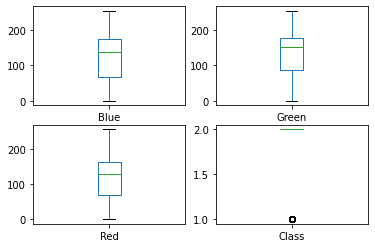

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

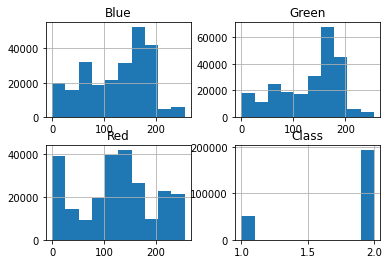

In [ ]:
dataset.hist()
plt.show()

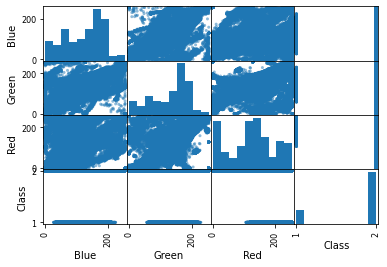

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

In [ ]:
# Split-out validaiton dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.999439 (0.000125)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.924058 (0.001223)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.998240 (0.000251)


In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9997347588345711
[[10175     0]
 [   13 38824]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10175
           2       1.00      1.00      1.00     38837

    accuracy                           1.00     49012
   macro avg       1.00      1.00      1.00     49012
weighted avg       1.00      1.00      1.00     49012

